In [1]:
import numpy as np
from src import sampling

In [2]:
np.random.dirichlet([5,0.4,0.4])

array([9.74211792e-01, 4.61761079e-06, 2.57835907e-02])

In [4]:
from src.utils import fed_avg
import torch
local_weights = [{"a":torch.tensor([1,2,3]), "b":torch.tensor([4,5,6])}, {"a":torch.tensor([5,4,3]), "b":torch.tensor([2,1,0])}]
#expected avg should be 3
dataset_size_per_client = [10000000, 10]
global_weights = fed_avg(local_weights, dataset_size_per_client)
global_weights

{'a': tensor([1.0000, 2.0000, 3.0000]), 'b': tensor([4.0000, 5.0000, 6.0000])}

In [1]:
import os
# C:\Users\lyada\Desktop\Federated-Learning-PyTorch\save\objects\fedimputed_0.1_mnist_exq_10_C[1.0]_iid[2]_E[1]_B[10].pkl
# path = "C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\fedimputed_0.1_mnist_exq_10_C[1.0]_iid[2]_E[1]_B[10].pkl"
path = "C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\0.1_mnist_cnn_30_C[1.0]_iid[2]_E[10]_B[10].pkl"
# path = "C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\fedimputed_0.1_mnist_exq_1_C[1.0]_iid[2]_E[10]_B[10].pkl"
import pickle

with open(path, 'rb') as f:
    data = pickle.load(f)

#[type_metric, user, global round]
print(len(data))
print(len(data[0][0]))


3
15


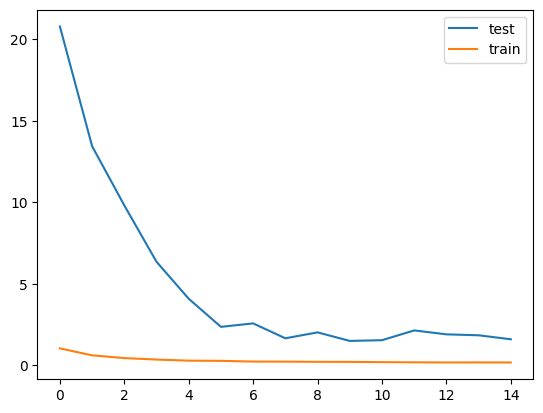

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# fig, ax = plt.subplots()
xs = np.arange(15)
# for i in range(len(data[0])):
plt.plot(xs, data[1][0], label = "test")
plt.plot(xs, data[0][0], label = "train")
# plt.plot(xs, np.mean(data[0], axis=0), label = "global")
plt.legend()
plt.show()
# print(data[0][0])
# np.mean(data[0], axis=0)

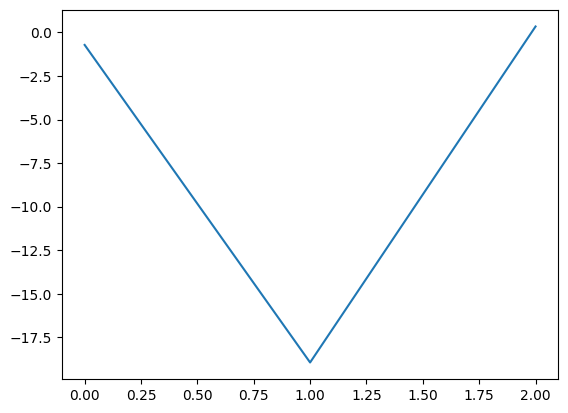

In [11]:
 plt.plot([data[0][0], data[1][0], data[2][0]])

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
1.0


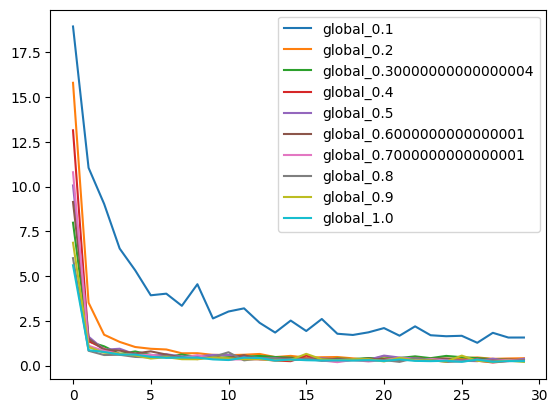

In [42]:
clients_data = []
for x in range(1, 11):
    print(x/10)
    path = f"C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\{x/10}_mnist_cnn_30_C[1.0]_iid[2]_E[10]_B[10].pkl"
    with open(path, 'rb') as f:
        clients_data.append(pickle.load(f))
for a in range(10):
    plt.plot(xs, np.mean(clients_data[a][1], axis=0), label = f"global_{0.1*(a+1)}")
plt.legend()
plt.show()

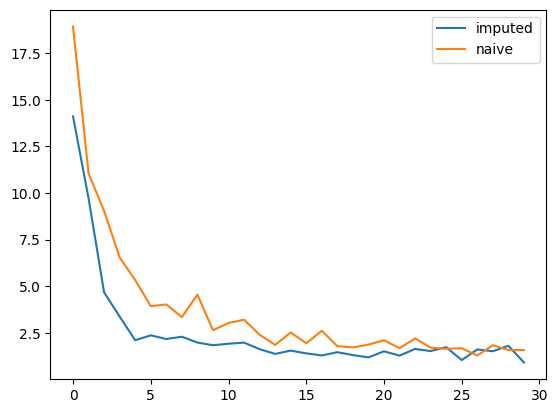

In [46]:
import pickle
path = f"C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\fedimputed_0.1_mnist_cnn_30_C[1.0]_iid[2]_E[10]_B[10].pkl"
path_1 = f"C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\0.1_mnist_cnn_30_C[1.0]_iid[2]_E[10]_B[10].pkl"
with open(path, 'rb') as f:
    a = pickle.load(f)
with open(path_1, 'rb') as f:
    b = pickle.load(f)
# print(len(a[0]))
plt.plot(xs, np.mean(a[1], axis=0), label = f"imputed")
plt.plot(xs, np.mean(b[1], axis=0), label = f"naive")
plt.legend()
plt.show()

In [10]:
clients_data = []
for x in range(2, 12):
    print(x/10)
    path = f"C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\save\\objects\\{x/10}_mnist_cnn_30_C[1.0]_iid[2]_E[10]_B[10].pkl"
    with open(path, 'rb') as f:
        clients_data.append(pickle.load(f))
for a in range(5):
    plt.plot(xs, np.mean(clients_data[a][2], axis=0), label = f"global_{0.2*(a+1)}")
plt.legend()
plt.show()

0.2


NameError: name 'pickle' is not defined

In [2]:
from src.models import ExquisiteNetV2, ResNet, Bottleneck
from src.vae.mnist_vae import VaeAutoencoderClassifier

# model = ExquisiteNetV2(10, 1)
# model = VaeAutoencoderClassifier(dim_encoding=2)
model = ResNet(block=Bottleneck,
               layers=[2,2,2,2],
               num_classes=10,
               grayscale=True)
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 13960394


In [6]:
class args:
    def __init__(self):
        self.num_channels = 1
        self.iid = 1
        self.num_classes = 10

In [7]:
from src.models import CNNMnist, CNNCifar, CNNFashion_Mnist
from src.models import CNNMnist
args = args()
model = CNNMnist(args=args)
# model = VaeAutoencoderClassifier(dim_encoding=2)
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 21840


In [1]:
from src.utils import get_dataset
class args:
    def __init__(self):
        self.dataset = "mnist"
        self.iid = 1
        self.num_users = 3

a = args()
print(a.dataset)

train_dataset, test_dataset, user_groups = get_dataset(a)

mnist


In [2]:
len(train_dataset)


60000

In [3]:
print(train_dataset[0][0].shape, train_dataset[0][1])

torch.Size([1, 28, 28]) 5


In [7]:
from src.vae.mnist_vae import VaeAutoencoderClassifier
from src.impute import impute_naive
import torch
trained_vae = VaeAutoencoderClassifier(dim_encoding=2)
trained_vae.load_state_dict(torch.load("C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\vae_data\\models\\vae_0.1.pth"))
generated_dataset = impute_naive(k=30, trained_vae=trained_vae, initial_dataset=train_dataset)

In [8]:
len(generated_dataset)

60030

0
0
5
2
0
9
9
9
2
9
2
9
9
0
7
6
9
5
7
9
1
5
1
9
5
9
0
6
3
5


C:\Users\lyada\Desktop\Federated-Learning-PyTorch\src\plots.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


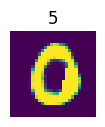

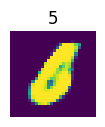

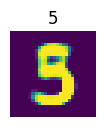

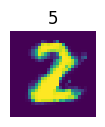

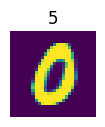

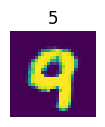

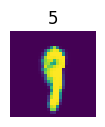

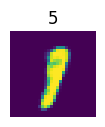

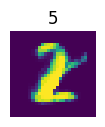

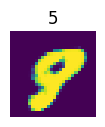

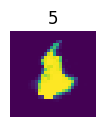

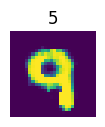

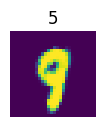

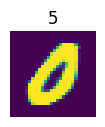

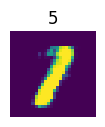

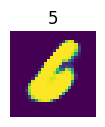

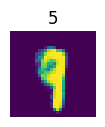

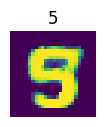

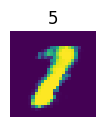

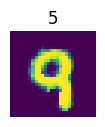

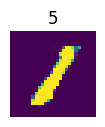

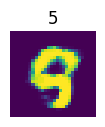

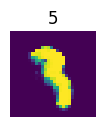

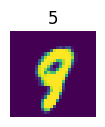

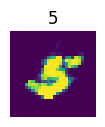

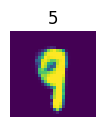

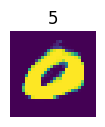

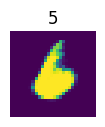

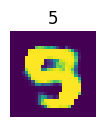

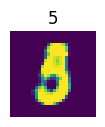

In [9]:
from src.plots import plot_image_label
# r = 60026
for r in range(60000, len(generated_dataset)):
    print(generated_dataset[r][1])
    plot_image_label(generated_dataset[r][0].cpu().detach().numpy(), generated_dataset[0][1])

In [34]:
import numpy as np
np.argmax(generated_dataset[1][2].detach().numpy())
to_be_zipped = []
for image_ind in range(3):
    to_be_zipped.append((generated_dataset[0][image_ind], np.argmax(generated_dataset[1][image_ind].detach().numpy())))


In [3]:
import torch
torch.cuda.is_available()

True